#Image classification using CNN 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
classes[9]

'truck'

In [16]:
def plot_image(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

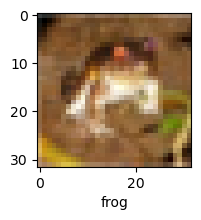

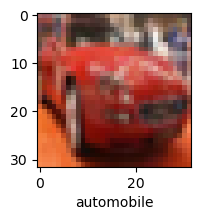

In [18]:
plot_image(x_train,y_train,0) 
plot_image(x_train,y_train,5)

In [19]:
x_train=x_train/255
x_test=x_test/255

##First try with Artificial neural network

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

C:\Users\dhanu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.3041 - loss: 1.9298
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4192 - loss: 1.6473
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4567 - loss: 1.5499
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4751 - loss: 1.4934
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4982 - loss: 1.4319


In [23]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4828 - loss: 1.4516


[1.4507488012313843, 0.4839000105857849]

##Accuracy is quite low with ANN so now we go ahead with CNN

In [25]:
cnn = models.Sequential([
        #CNN
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        #Dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

C:\Users\dhanu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7440 - loss: 0.7239
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7551 - loss: 0.7020
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7655 - loss: 0.6694
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7739 - loss: 0.6463
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7816 - loss: 0.6282


In [30]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6873 - loss: 0.9280


[0.943417489528656, 0.6808000206947327]

In [31]:
y_test=y_test.reshape(-1,)

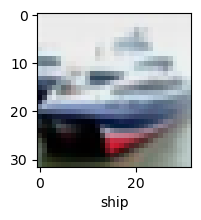

In [33]:
plot_image(x_test,y_test,1)

##Results

In [34]:
y_pred=cnn.predict(x_test)
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[3, 8, 8, 0, 6]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
classes[y_classes[1]]

'ship'

In [40]:
from sklearn.metrics import classification_report
print('Classification_Report \n' , classification_report(y_test,y_classes))

Classification_Report 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.85      0.77      0.81      1000
           2       0.61      0.52      0.56      1000
           3       0.45      0.57      0.50      1000
           4       0.65      0.58      0.61      1000
           5       0.64      0.48      0.55      1000
           6       0.75      0.77      0.76      1000
           7       0.68      0.78      0.73      1000
           8       0.76      0.82      0.79      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

